# Лабораторная работа №1. Теория погрешностей
## Бегунов Никита
## А-13б-20
### Вариант 21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

## Задача 1.1
**Задание:** Найти значения  машинного нуля, машинной бесконечности и машинного эпсилон.

Примем следующие способы определения приближенных значений  параметров, требуемых в задаче:
1. Для нахождения машинной бесконечности положим $x_∞ = 2^n$, где n - первое натуральное число, при котором происходит переполнение.

In [2]:
n = 1.0
i = 0
while n != np.inf:
    n *= 2
    i += 1
inf = 2 ** (i - 1)
print(f'Машиная бесконечность: {inf:.2e}, происходит переполнение при степени n = {i}')

Машиная бесконечность: 8.99e+307, происходит переполнение при степени n = 1024


2. Положим $x_0 = 2^{-m}$, где  m – первое натуральное число , при котором $2^{-m}$ совпадает с нулем.

In [3]:
n = 1
i = 0
while n != 0:
    n /= 2
    i += 1
zero = 0.5 ** i
print(f'Машинный ноль: 2^{-i} = {zero:.2e}, совпадает с нулем при m = {i}')

Машинный ноль: 2^-1075 = 4.94e-324, совпадает с нулем при m = 1075


3. Положим $\epsilon_M = 2^{-k}$, где  k – наибольшее натуральное число, при котором сумма вычисленного значения  1+$2^{-k}$ еще больше 1. Фактически $\epsilon_M$ есть граница относительной погрешности представления числа $x^*≈1$.

In [4]:
n = 1
i = 0
while 1 + n != 1:
    n /= 2
    i += 1
eps = 0.5 ** (i)
print(f'Машинный эпсилон: 2^{-i} = {eps:.2e}, число не отличимо от 1 при k = {i}')

Машинный эпсилон: 2^-53 = 1.11e-16, число не отличимо от 1 при k = 53


**Вывод:** благодаря сделанным вычислениям мне удалось вычислить значения машинной бесконечности, машинного ноля и машинного эпсилон. Можно сказать, что разрядов для хранения мантиссы примерно в 19 раз меньше, чем разрядов для хранения порядка числа в двоичном представлении.

# Задача 1.2
**Задание:**  Исследовать поведение погрешности приближения функции F(x) = xcos(x) частичными суммами на отрезке [a,b] = [1,4].
1. Используя разложения стандартных функций  в ряд Тейлора в окрестности нуля, получить разложение функции  F(x) по степеням x.
$F(x) = xcos(x) = \sum_{i=0}^{∞} {(-1)^k x^{2k+1}\over {2k!}} = x - {x^3\over {2!}} + {x^5\over {4!}} + ... + {(-1)^k x^{2k+1}\over {2k!}}$

2. Составить процедуру, вычисляющую частичную сумму N членов ряда S(x,N).

In [5]:
def F(x):
    return x*np.cos(x)

#Вспомогательная функция для вычисления факториала
def Fact(n):
    f = 1
    for i in range(1, n + 1):
        f *= i
    return f

def n_term(x, k):
    return (-1)**k * x**(2*k+1) / Fact(2*k)

def S(x, N):
    res = 0
    for i in range(N):
        res = res + n_term(x,i)
    return res

3. Построить графики исходной функции и первых пяти  частичных сумм: S(x,1),…S(x.5).

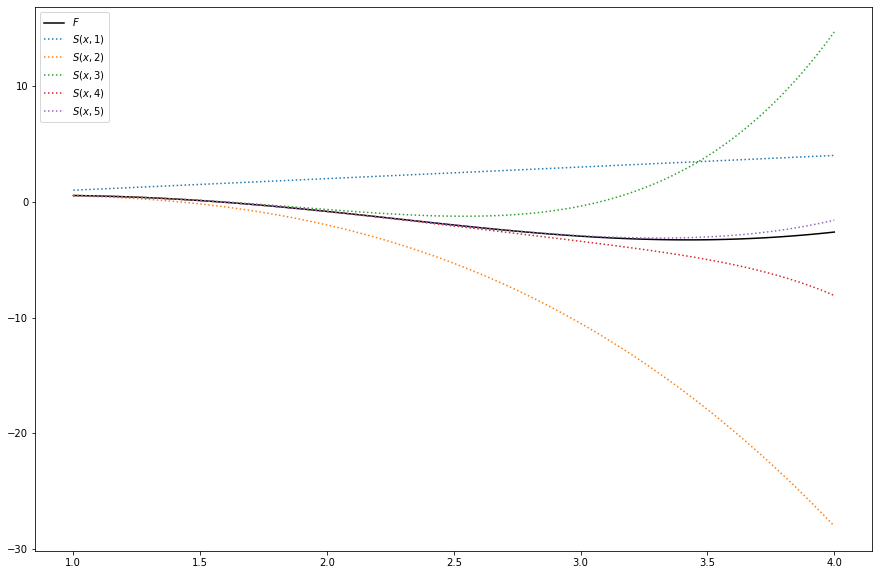

In [6]:
a = 1
b = 4
x_data = np.linspace(a, b, 100)
fig = plt.subplots(1, 1, figsize=(15, 10))

plt.plot(x_data, F(x_data), label='$F$', color="black")
for i in range(1,6):
    plt.plot(x_data, S(x_data, i), label=f'$S(x,{i})$', ls = 'dotted')
plt.legend()

4. Составить функции, вычисляющие абсолютную погрешность $\Delta(x, N) = |S(x, N) - F(x)|$ и относительную погрешность $\delta(x, N) = {\Delta(x, N)\over{|S(x, N)|}}$. Построить графики погрешностей первых  пяти частичных сумм.

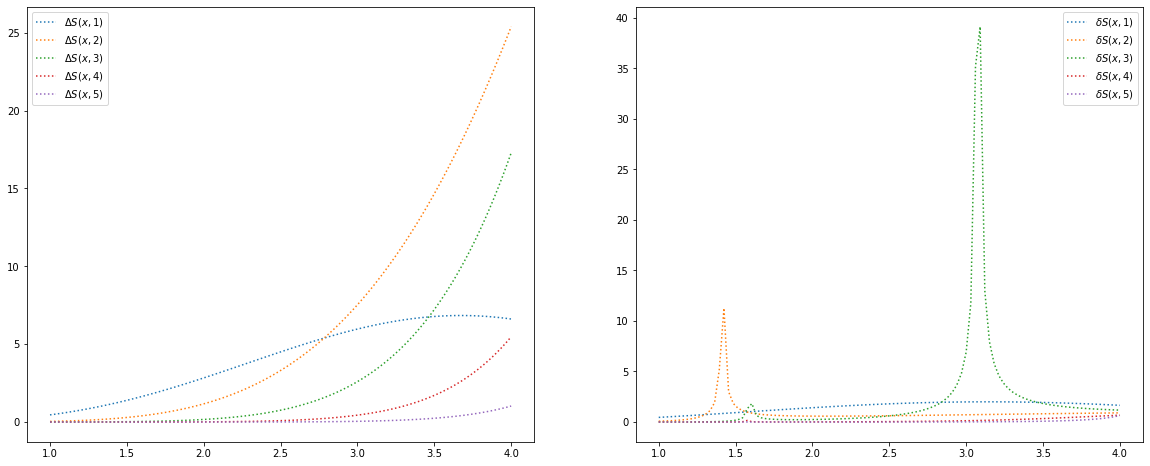

In [7]:
#Абсолютная погрешность
def absoluteError(x, N):
    return np.abs(S(x, N) - F(x))

#Относительная погрешность
def relativeError(x, N):
    return np.abs(absoluteError(x, N) / S(x, N))

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
for i in range(1, 6):
    axs[0].plot(x_data, absoluteError(x_data, i), label=f'$\Delta S(x,{i})$', ls='dotted')
for i in range(1, 6):
    axs[1].plot(x_data, relativeError(x_data, i), label=f'$\delta S(x,{i})$', ls='dotted')
axs[0].legend()
axs[1].legend()

5. Определить количество членов ряда N, при котором величина относительной погрешности в средней точке отрезка станет меньше машинного эпсилон. Величину относительной погрешности вычислять как отношение прибавляемого члена к накопленной частичной сумме $S(x, N)$, взятое по модулю. 

In [8]:
x = (a + b) / 2
n = 2
while np.abs((S(x, n) - S(x, n - 1)) / S(x, n - 1)) >= eps:
    n += 1
print(f"При {n} членах ряда величина относительной погрешности меньше машинного эпсилон")

При 14 членах ряда величина относительной погрешности меньше машинного эпсилон


6. При найденном значении N построить графики абсолютной погрешности $\Delta(x, N)$ и относительной погрешности $\delta(x, N)$.

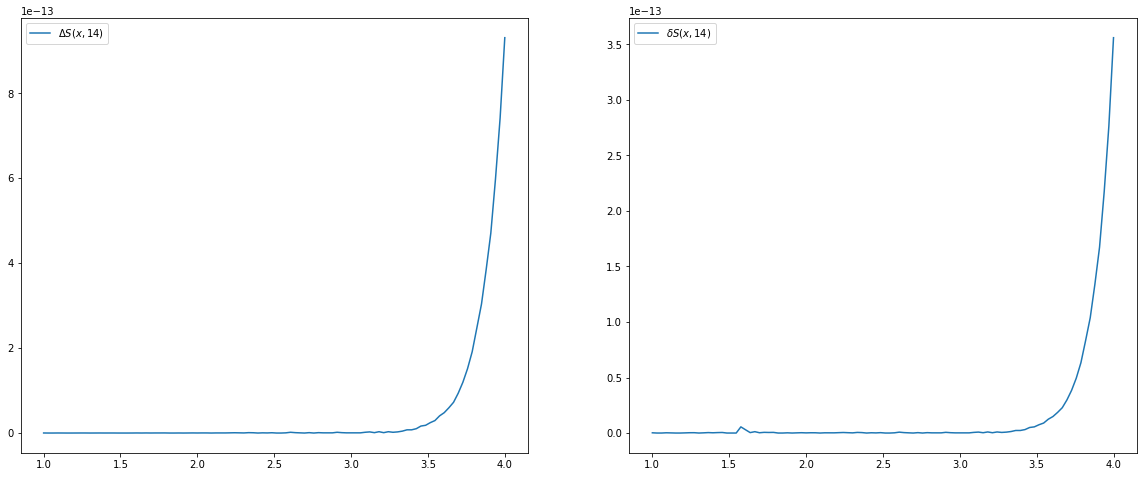

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].plot(x_data, absoluteError(x_data, n), label=f'$\Delta S(x,{n})$')
axs[1].plot(x_data, relativeError(x_data, n), label=f'$\delta S(x,{n})$')
axs[0].legend()
axs[1].legend()

7. Составить программу округления вычислений результата до t разрядов мантиссы и произвести расчеты п.4 с учетом округления.

111111111 111110000.0
1.11111111e-07 1.1111e-07


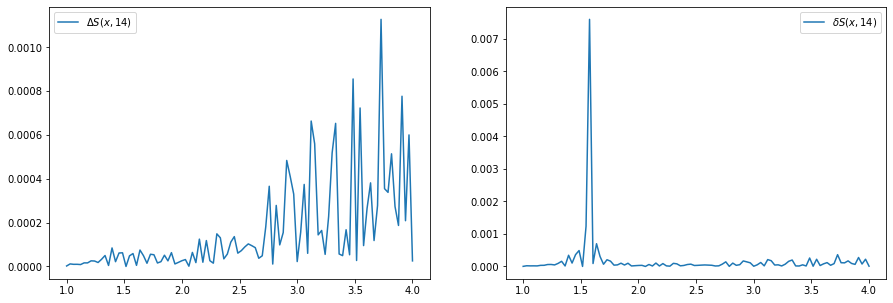

In [10]:
def Round(x):
    return float(np.format_float_scientific(x, precision = 4))
print(111111111, Round(111111111))
print(0.000000111111111, Round(0.000000111111111))

def S_rounded_(x, N):
    res = 0
    for i in range(N):
        res += Round(n_term(x,i))
        res = Round(res)
    return res
def S_rounded(x, N):
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_rounded_(x[i], N)
    return res

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_data, np.abs(F(x_data) - S_rounded(x_data, n)), label=f'$\Delta S(x,{n})$')
axs[1].plot(x_data, np.abs((F(x_data) - S_rounded(x_data, n)) / S_rounded(x_data, n)), label = f'$\delta S(x,{n})$')
axs[0].legend()
axs[1].legend()

8. Сравнить полученные результаты и составить отчет по задаче.

**Вывод:** исходя из полученных вычислений можно сказать, что точность приближения разложения функции в ряд Тейлора увеличивается с увеличением количества слагаемых в ряде. В середрине отрезка достигается относительная погрешность, меньшая машинного эпсилон при 14 членах разложения, однако эта точность теряется по мере отдаления от нуля.

# Задача 1.3
**Задание:** Дана функция $f(a, b, c) = {10ab\over{a^2+c}}, a = 12.315, b = 0.0352, c = 10.82$. Значения переменных указаны в варианте со всеми верными цифрами. Оценить погрешность результата двумя способами:  
а) используя оценки погрешности для арифметических операций  
б) используя общую формулу погрешностей.  
Результат представить в двух формах записи: с явным указанием погрешностей и с учетом количества верных цифр.

а) $\Delta a = 0.0005$,  $\Delta b = 0.00005$,  $\Delta c = 0.005$  
$\delta a = {0.0005 \over{12.315}} = 0.0000406$,  $\delta b = {0.00005 \over{0.0352}} = 0.001420$,  $\delta c = {0.005 \over{10.82}} = 0.0004621$  
$\delta(ab) = \delta a + \delta b = 0.0000406 + 0.001420 = 0.0014606$  
$\delta(a^2) = \delta a + \delta a = 0.0000406 + 0.0000406 = 0.0000812$  
$\delta(a^2 + с) = \max(\delta (a^2), \delta (c)) = \max(0.0000812, 0.0004621) = 0.0004621$  
$\delta f = {\delta(ab) + \delta(a^2+c) \over{1 - \delta(a^2 + c)}} = {0.0014606 + 0.0004621 \over{1 - 0.0004621}} = {0,0019227 \over{0,9995379}} = 0,0019236$  
$f = {10 * 12.315 * 0.0352 \over{12.315^2+10.82}} = 0.0266796$  
$\Delta f = f * \delta f = 0.0266796 * 0.0019236 = 0,00005132$  
Округляя погрешность до двух значащих цифр получаем  
$f = 0,001924 ± 0,000051$ - с указанием погрешностей  
$f = 0,0019 ± 0,0001$ - с учетом верных цифр

б) $\Delta f = |{\delta f \over{\delta a}} (a, b, c)| \Delta a + |{\delta f \over{\delta b}} (a, b, c)| \Delta b + |{\delta f \over{\delta c}} (a, b, c)| \Delta c$  
${\delta f \over{\delta a}} = {10b - 2a \over{(a^2+c)^2}}, {\delta f \over{\delta b}} = {10a\over{a^2+c}}, {\delta f \over{\delta c}} = {-10ab \over{(a^2+c)^2}}$  
${\delta f \over{\delta a}}(a, b, c) = {10*0.0352 - 2*12.315 \over{(12.315^2+10.82)^2}} = -0.000923427, {\delta f \over{\delta b}}(a, b, c) = {10*12.315\over{12.315^2+10.82}} = 0.757943, {\delta f \over{\delta c}}(a, b, c) = {-10*12.315*0.0352 \over{(12.315^2+10.82)^2}} = -0.000164203$  
$\Delta f = 0.000923427 * 0.0005 + 0.757943 * 0.00005 + 0.000164203 * 0.005 = 0.00003918$  
$f = {10 * 12.315 * 0.0352 \over{12.315^2+10.82}} = 0.0266796$  
Округляя погрешность до двух значащих цифр получаем  
$f = 0,001924 ± 0,000039$ - с указанием погрешностей  
$f = 0,0019 ± 0,0001$ - с учетом верных цифр

**Вывод:** из полученных расчетов можно сказать, что вычисление через общую формулу погрешности получается более точным, чем при оценке для арифметических операция, но с учетом верных цифр результаты получились одинаковые.